In [2]:
import Preprocess as util
import numpy as np
import matplotlib.pyplot as plt
import keras
import keras.backend as K
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential, Input
from keras.layers import Dropout, Flatten, Dense

/home/arko/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Loading Data

In [3]:
input_data, labels = util.load_data()
print('Input Data Shape = {}'.format(input_data.shape))
print('App Rating Data Shape = {}'.format(labels.shape))

/home/arko/Deep Learning Works/GooglePlay_App_Rating/Preprocess.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["Size"][i] = value[0]
/home/arko/Deep Learning Works/GooglePlay_App_Rating/Preprocess.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["Size"][i] = value[0]


Input Data Shape = (10840, 7)
App Rating Data Shape = (10840, 1)


# Train Test Split

In [4]:
train_x, test_x, train_y, test_y = train_test_split(input_data, labels, test_size = 0.20, random_state = 42)
print('Training input data shape = {}'.format(train_x.shape))
print('Training labels shape = {}'.format(train_y.shape))
print('Testing input data shape = {}'.format(test_x.shape))
print('Testing labels shape = {}'.format(test_y.shape))

Training input data shape = (8672, 7)
Training labels shape = (8672, 1)
Testing input data shape = (2168, 7)
Testing labels shape = (2168, 1)


# Architecture of Neural Network

In [11]:
input_tensor = Input(shape = (input_data.shape[1],))

def model(input_value):
    x = Dense(units = 200, activation = 'tanh')(input_value)
    x = Dense(units = 100, activation = 'relu')(x)
    x = Dense(units = 50, activation = 'tanh')(x)
    x = Dense(units = 30, activation = 'relu')(x)
    x = Dense(units = 10, activation = 'tanh')(x)
    output = Dense(units = 1, activation = 'relu')(x)
    model = Model(inputs = input_value, outputs = output, name = 'AppRating_model')
    model.summary()
    return model 

def compile_and_train(model, num_epochs):
    model.compile(optimizer= 'adadelta', loss= 'mse') 
    history = model.fit(train_x, train_y, batch_size=32, epochs = num_epochs)
    return history

# Training of Model on Train Dataset

In [12]:
epochs = 200
AppRating_model = model(input_tensor)
history = compile_and_train(AppRating_model, epochs)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 200)               1600      
_________________________________________________________________
dense_20 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_21 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_22 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total para

8672/8672 [==============================] - 1s 147us/step - loss: 0.2398
Epoch 81/200
8672/8672 [==============================] - 1s 142us/step - loss: 0.2394
Epoch 82/200
8672/8672 [==============================] - 1s 136us/step - loss: 0.2392
Epoch 83/200
8672/8672 [==============================] - 1s 161us/step - loss: 0.2390
Epoch 84/200
8672/8672 [==============================] - 1s 144us/step - loss: 0.2391
Epoch 85/200
8672/8672 [==============================] - 1s 158us/step - loss: 0.2397
Epoch 86/200
8672/8672 [==============================] - 1s 143us/step - loss: 0.2386
Epoch 87/200
8672/8672 [==============================] - 1s 138us/step - loss: 0.2383
Epoch 88/200
8672/8672 [==============================] - 1s 137us/step - loss: 0.2386
Epoch 89/200
8672/8672 [==============================] - 1s 146us/step - loss: 0.2399
Epoch 90/200
8672/8672 [==============================] - 1s 144us/step - loss: 0.2394
Epoch 91/200
8672/8672 [==============================] 

8672/8672 [==============================] - 1s 146us/step - loss: 0.2327
Epoch 174/200
8672/8672 [==============================] - 1s 144us/step - loss: 0.2330
Epoch 175/200
8672/8672 [==============================] - 1s 135us/step - loss: 0.2324
Epoch 176/200
8672/8672 [==============================] - 1s 150us/step - loss: 0.2344
Epoch 177/200
8672/8672 [==============================] - 1s 143us/step - loss: 0.2317
Epoch 178/200
8672/8672 [==============================] - 1s 149us/step - loss: 0.2321
Epoch 179/200
8672/8672 [==============================] - 1s 152us/step - loss: 0.2320
Epoch 180/200
8672/8672 [==============================] - 1s 151us/step - loss: 0.2317
Epoch 181/200
8672/8672 [==============================] - 1s 135us/step - loss: 0.2317
Epoch 182/200
8672/8672 [==============================] - 1s 135us/step - loss: 0.2323
Epoch 183/200
8672/8672 [==============================] - 1s 161us/step - loss: 0.2336
Epoch 184/200
8672/8672 [=====================

# Custom Training Accuracy using Distance

In [30]:
def distance_accuracy(y_true,y_pred):
    true_count = 0
    false_count = 0
    diff = y_true - y_pred
    for i in range(diff.shape[0]):
        if (diff[i] <= 0.55):
            true_count = true_count + 1
        else:
            false_count = false_count + 1
    acc = true_count/(true_count+false_count)
    return acc

y_pred = AppRating_model.predict(train_x)
y_true = train_y
acc = distance_accuracy(y_true,y_pred)
print('Final Training accuracy  = {}'.format(acc))

Final Training accuracy  = 0.8818035055350554


# Plot of Loss over Epoch

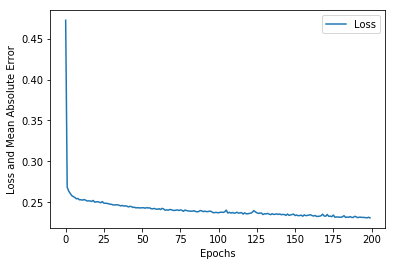

In [20]:
epoch_list = [i for i in range(epochs)]
loss_list = history.history['loss']

plt.xlabel('Epochs')
plt.ylabel('Loss and Mean Absolute Error')
plt.plot(epoch_list,loss_list, label = 'Loss')
plt.legend(loc = 'upper right')
plt.show()

# Testing on Unseen Test Data

In [31]:
loss = AppRating_model.evaluate(test_x,test_y)
print('Test Loss = {}'.format(loss))
y_pred = AppRating_model.predict(test_x)
y_true = test_y
acc = distance_accuracy(y_true,y_pred)
print('Test Accuracy = {}'.format(acc))

2168/2168 [==============================] - 0s 90us/step
Test Loss = 0.22513612043593642
Test Accuracy = 0.8819188191881919
